<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/TensorFlow2/Tutorial/Getting_started_TensorFlow2/Sequential_model_API/Sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sequential model API

## Coding tutorials
#### [1. Building a Sequential model](#coding_tutorial_1)
#### [2. Convolutional and pooling layers](#coding_tutorial_2)
#### [3. The compile method](#coding_tutorial_3)
#### [4. The fit method](#coding_tutorial_4)
#### [5. The evaluate and predict methods](#coding_tutorial_5)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


***
## Load the data

In [ ]:
from tensorflow.keras.preprocessing import image

# Load the Fashion-MNIST data
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
    fashion_mnist_data.load_data()

# Print the shape of the training data
print("Train data shape: {}".format(train_images.shape))

# Define the labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Train label at 0:", train_labels[0])

4423680/4422102 [==============================] - 0s 0us/step
Train data shape: (60000, 28, 28)
Train label at 0: 9


In [ ]:
# Rescale the image values so that they lie in between 0 and 1
train_images = train_images / 255.
test_images = test_images / 255.

label: Coat


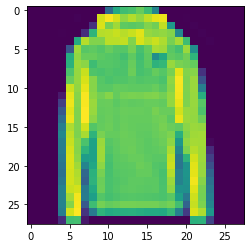

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Display one of the images
i = 24
img = train_images[i,:,:]
print(f"label: {labels[train_labels[i]]}")
plt.imshow(img)
plt.show()

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

#### Build a feedforward neural network model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build the sequential feedforward neural network model

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(16, activation='relu', name='layer_1'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.weights

[<tf.Variable 'layer_1/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[-0.07623756,  0.06418069, -0.05637813, ..., -0.00584909,
         -0.06777211, -0.03286308],
        [-0.00639053, -0.0575102 , -0.04040531, ..., -0.06794938,
          0.00469057, -0.06428798],
        [-0.05716452,  0.02114917, -0.02707843, ...,  0.04712299,
         -0.08001825, -0.062967  ],
        ...,
        [-0.08056416,  0.03121634, -0.08107314, ...,  0.05348615,
         -0.00350116, -0.01646799],
        [-0.03601038, -0.08047215, -0.0713885 , ...,  0.0289145 ,
          0.0302598 ,  0.08324154],
        [-0.06882937,  0.05886206, -0.04378562, ...,  0.08516805,
          0.06946594, -0.04688221]], dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[-0.42807686,  0.3267583 , -0.18568653,  0.27595

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [ ]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', 'top_k_categorical_accuracy'])

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.01>


In [ ]:
import numpy as np 

# Fit the model
history = model.fit(train_images, train_labels,
    epochs=8, batch_size=32, verbose=2)

Epoch 1/8
1875/1875 - 3s - loss: 1.6286 - accuracy: 0.5227 - top_k_categorical_accuracy: 0.6919
Epoch 2/8
1875/1875 - 3s - loss: 1.0496 - accuracy: 0.6917 - top_k_categorical_accuracy: 0.5646
Epoch 3/8
1875/1875 - 3s - loss: 0.8403 - accuracy: 0.7368 - top_k_categorical_accuracy: 0.4730
Epoch 4/8
1875/1875 - 3s - loss: 0.7301 - accuracy: 0.7623 - top_k_categorical_accuracy: 0.4264
Epoch 5/8
1875/1875 - 3s - loss: 0.6568 - accuracy: 0.7845 - top_k_categorical_accuracy: 0.4239
Epoch 6/8
1875/1875 - 3s - loss: 0.6022 - accuracy: 0.8015 - top_k_categorical_accuracy: 0.4599
Epoch 7/8
1875/1875 - 3s - loss: 0.5631 - accuracy: 0.8127 - top_k_categorical_accuracy: 0.4799
Epoch 8/8
1875/1875 - 3s - loss: 0.5351 - accuracy: 0.8210 - top_k_categorical_accuracy: 0.4938


       loss  accuracy  top_k_categorical_accuracy
0  1.628568  0.522733                    0.691883
1  1.049626  0.691667                    0.564617
2  0.840317  0.736833                    0.473017
3  0.730062  0.762267                    0.426367
4  0.656832  0.784467                    0.423867


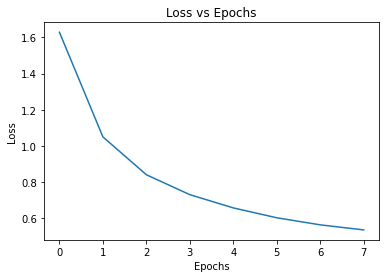

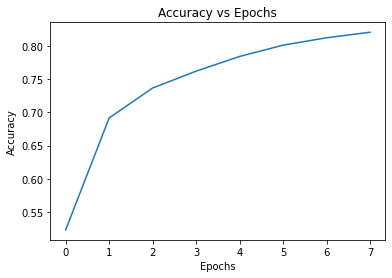

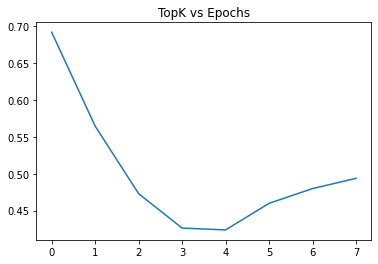

In [ ]:
# Plot training history
import pandas as pd

# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
print(df.head())

# Make a plot for the loss
loss_plot = df.plot(y="loss", title="Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")
plt.show()

# Make a plot for the accuracy
acc_plot = df.plot(y="accuracy",
    title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
plt.show()

# Make a plot for the topK
topk_plot = df.plot(y="top_k_categorical_accuracy",
    title="TopK vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="TopK")
plt.show()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods
#### Evaluate the model on the test set

In [ ]:
# Evaluate the model
test_loss, test_acc, test_topk = model.evaluate(test_images, 
    test_labels, verbose=2)

313/313 - 1s - loss: 0.5502 - accuracy: 0.8107 - top_k_categorical_accuracy: 0.5122


#### Make predictions from the model

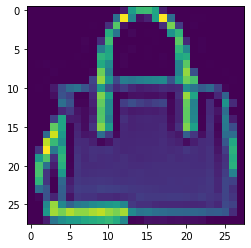

Label: Bag
Model predictions: Bag


In [ ]:
# Choose a random test image

random_idx = np.random.choice(test_images.shape[0])
test_image = test_images[random_idx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_idx]]}")

# Get the model predictions
pred = model.predict(test_image[np.newaxis,...])
print(f"Model predictions: {labels[np.argmax(pred)]}")

***
<a id="coding_tutorial_2"></a>
## Convolution and pooling layers
#### Build a convolutional neural network model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, kernel_size=3, padding='SAME', strides=2, 
        activation='relu', input_shape=(28,28,1), 
        data_format='channels_last'),
    MaxPooling2D(pool_size=3, data_format='channels_last'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 17,258
Trainable params: 17,258
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [ ]:
# Define the model optimizer, loss function and metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy, \
    SparseTopKCategoricalAccuracy

model.compile(optimizer=Adam(learning_rate=1e-3),
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy(),
        SparseTopKCategoricalAccuracy()])

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


In [ ]:
import numpy as np 

# Fit the model
history = model.fit(train_images[...,np.newaxis], train_labels,
    epochs=8, batch_size=32)

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5860 - sparse_categorical_accuracy: 0.7945 - sparse_top_k_categorical_accuracy: 0.9911
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4177 - sparse_categorical_accuracy: 0.8500 - sparse_top_k_categorical_accuracy: 0.9972
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3858 - sparse_categorical_accuracy: 0.8595 - sparse_top_k_categorical_accuracy: 0.9974
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3621 - sparse_categorical_accuracy: 0.8680 - sparse_top_k_categorical_accuracy: 0.9979
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3430 - sparse_categorical_accuracy: 0.8738 - sparse_top_k_categorical_accuracy: 0.9982
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3295 - sparse_categorical_accuracy: 0.8794 - sparse_top_k_categorical_accuracy: 0.9983
Epoch 7/8
1875/1

       loss  sparse_categorical_accuracy  sparse_top_k_categorical_accuracy
0  0.586043                     0.794467                           0.991050
1  0.417718                     0.850017                           0.997233
2  0.385778                     0.859483                           0.997433
3  0.362130                     0.867967                           0.997933
4  0.342981                     0.873767                           0.998183


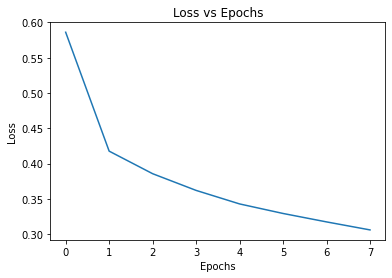

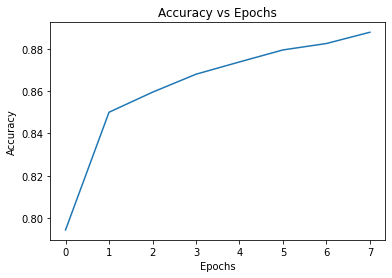

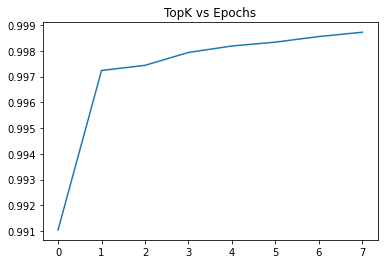

In [ ]:
# Plot training history
import pandas as pd

# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
print(df.head())

# Make a plot for the loss
loss_plot = df.plot(y="loss", title="Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")
plt.show()

# Make a plot for the accuracy
acc_plot = df.plot(y="sparse_categorical_accuracy",
    title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
plt.show()

# Make a plot for the topK
topk_plot = df.plot(y="sparse_top_k_categorical_accuracy",
    title="TopK vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="TopK")
plt.show()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods
#### Evaluate the model on the test set

In [ ]:
# Evaluate the model
test_loss, test_acc, test_topk = model.evaluate(test_images[...,np.newaxis], 
    test_labels, verbose=2)

313/313 - 1s - loss: 0.3530 - sparse_categorical_accuracy: 0.8703 - sparse_top_k_categorical_accuracy: 0.9978


#### Make predictions from the model

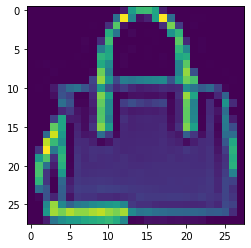

Label: Bag
Model predictions: Bag


In [ ]:
# Choose a random test image

test_image = test_images[random_idx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_idx]]}")

# Get the model predictions
pred = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model predictions: {labels[np.argmax(pred)]}")